In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [2]:
trips = pd.read_csv("data/trip.csv")
weather = pd.read_csv("data/weather.csv")
stations = pd.read_csv("data/station.csv")

In [3]:
trips.start_date = pd.to_datetime(trips.start_date)
trips.end_date = pd.to_datetime(trips.end_date)
trips.duration = trips.duration / 60
trips["week_day"] = trips.start_date.dt.weekday_name


In [4]:
trips["date"] = pd.to_datetime(trips.start_date.dt.date)

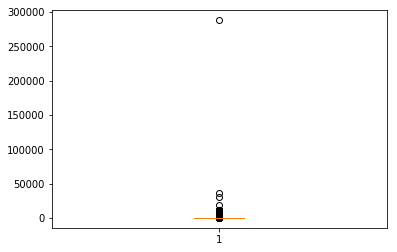

In [5]:
# Realizo un box plot para ver en general como estan distribuidas las duraciones de cada viaje.
pl.boxplot(trips.duration)
pl.show()

In [6]:
trips.loc[trips.duration > trips.duration.quantile(0.995), "duration"].mean() / 60

16.487833001658377

In [7]:
# # Queda claro que hay unos pocos numoeros que se van de escala, por lo que los elimino 
trips_without_outliers = trips[trips.duration < trips.duration.quantile(0.995)]
fin_de_semana = trips_without_outliers.start_date.dt.dayofweek > 4
dia_de_semana = trips_without_outliers.start_date.dt.dayofweek < 5
costumer = trips_without_outliers.subscription_type =="Customer"
subscriber = trips_without_outliers.subscription_type == "Subscriber"

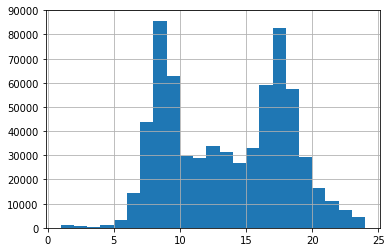

In [8]:
# Distribucion horaria del comienzo de los viajes
trips_without_outliers.start_date.apply(lambda date: date.hour).hist(bins=range(1,25))
pl.show()

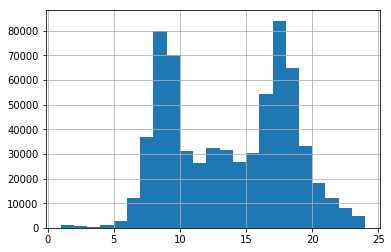

In [9]:
# Distribucion horaria de la finalizacion de los viajes
trips_without_outliers.end_date.apply(lambda date: date.hour).hist(bins=range(1,25))
pl.show()

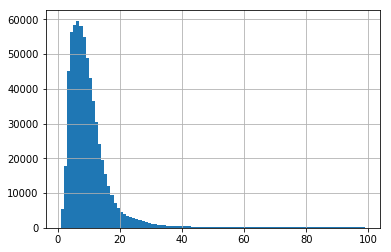

In [10]:
# Distribucion de la duracion de los viajes en cantidad de minutos
trips_without_outliers.duration.hist(bins=range(1,100))
pl.show()


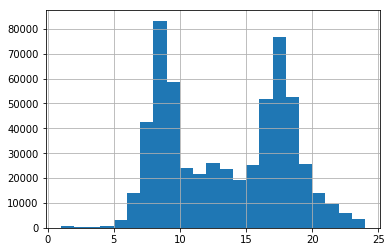

In [11]:
# Distribucion horaria del comienzo de los viajes los dias de semana
trips_without_outliers.start_date[dia_de_semana]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))

pl.show()

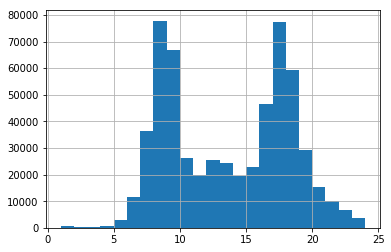

In [12]:
# Distribucion horaria de finalizacion de los viajes de los viajes los dias de semana
trips_without_outliers.end_date[dia_de_semana]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))

pl.show()

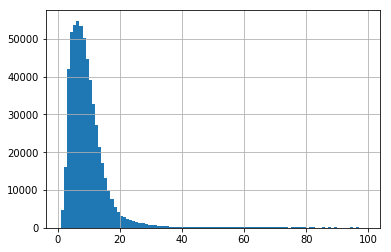

In [13]:
# Distribucion de la duracion de los viajes en cantidad de minutos comenzandos en dias de semana
trips_without_outliers.loc[dia_de_semana,:]\
     .duration\
     .hist(bins=range(1,100))

pl.show()

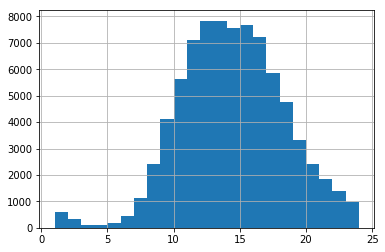

In [14]:
# Distribucion horaria del comienzo de los viajes los dias de fin de semana
trips_without_outliers.start_date[fin_de_semana]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))
        
pl.show()


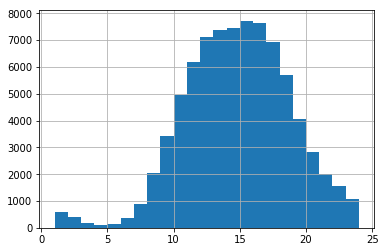

In [15]:
# Distribucion horaria de finalizacion de los viajes los dias de fin de semana
trips_without_outliers.end_date[fin_de_semana]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))
        
pl.show()        

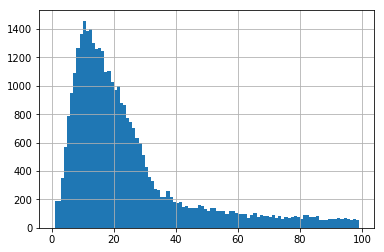

In [16]:
# Distribucion de la duracion de los viajes en cantidad de minutos comenzandos en dias de fin de semana
trips_without_outliers.loc[ np.logical_and(fin_de_semana , costumer),:]\
     .duration\
     .hist(bins=range(1,100))
        
# trips_without_outliers.subscription_type
pl.show()

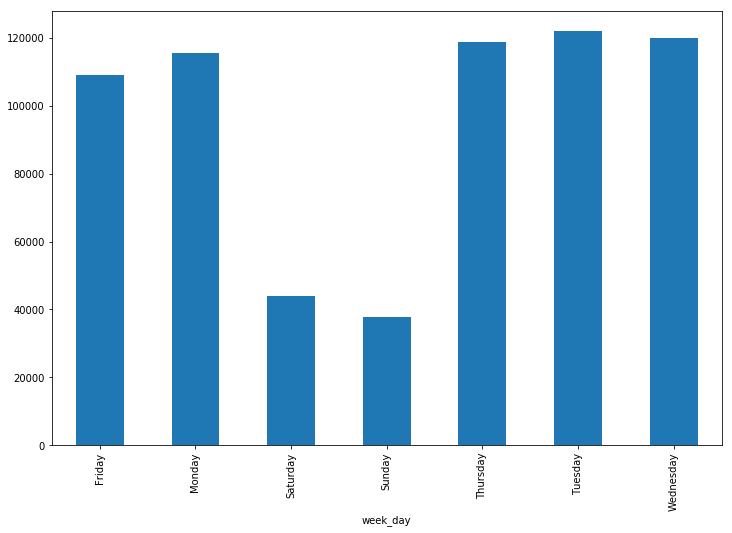

In [17]:
trips_without_outliers.groupby("week_day").size().plot(kind='bar',figsize=(12,8))

pl.show()

In [116]:
weather = pd.read_csv("data/weather.csv")

In [96]:
def toCelcius(f):
    return (f - 32) * 5.0/9.0

weather["max_temperature_C"] = toCelcius(weather.max_temperature_f)
weather["mean_temperature_C"] = toCelcius(weather.mean_temperature_f)
weather["min_temperature_C"] = toCelcius(weather.min_temperature_f)
weather["max_dew_point_C"] = toCelcius(weather.max_dew_point_f)
weather["mean_dew_point_C"] = toCelcius(weather.mean_dew_point_f)
weather["min_dew_point_C"] = toCelcius(weather.min_dew_point_f)
weather["date"] = pd.to_datetime(weather.date)

weather = weather.drop("max_temperature_f", 1)\
                 .drop("mean_temperature_f", 1)\
                 .drop("min_temperature_f", 1)\
                 .drop("max_dew_point_f", 1)\
                 .drop("mean_dew_point_f", 1)\
                 .drop("min_dew_point_f", 1)

In [117]:
RAIN = 'RAIN'
FOG = 'FOG'
FOG_RAIN = 'FOG_RAIN'
NORMAL = 'NORMAL'
RAIN_THUNDERSTORM = 'RAIN_THUNDERSTORM'

raining  = np.logical_or(weather.events == 'Rain', weather.events == 'rain')
fog      = weather.events == 'Fog'
fog_rain = weather.events == 'Fog-Rain' 
rain_thunderstorm = weather.events == 'Rain-Thunderstorm'

weather.loc[raining,"events"] = RAIN
weather.loc[fog,"events"] = FOG
weather.loc[fog_rain,"events"] = FOG_RAIN
weather.loc[weather.events.isnull(), "events"] = NORMAL
weather.loc[rain_thunderstorm, "events"] = RAIN_THUNDERSTORM

El Set de weather tiene 5 mediciones distitnas para cada dia. Voy a quedarme con el que tenga menos eventos en estado NORMAL dado que considero que es la estacion que mas caracterizo. 

In [98]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

In [118]:
weather_94107 = weather.loc[weather.zip_code == 94107, :]
weather_94063 = weather.loc[weather.zip_code == 94063, :]
weather_94301 = weather.loc[weather.zip_code == 94301, :]
weather_94041 = weather.loc[weather.zip_code == 94041, :]
weather_95113 = weather.loc[weather.zip_code == 95113, :]

In [100]:
weather_94107.groupby("events").size()

events
FOG                   54
FOG_RAIN              10
NORMAL               574
RAIN                  93
RAIN_THUNDERSTORM      2
dtype: int64

In [101]:
weather_94063.groupby("events").size()

events
FOG          17
FOG_RAIN      2
NORMAL      639
RAIN         75
dtype: int64

In [102]:
weather_94301.groupby("events").size()

events
FOG                   18
FOG_RAIN               1
NORMAL               653
RAIN                  60
RAIN_THUNDERSTORM      1
dtype: int64

In [103]:
weather_94041.groupby("events").size()

events
FOG          10
FOG_RAIN      2
NORMAL      639
RAIN         82
dtype: int64

In [104]:
weather_95113.groupby("events").size()

events
FOG          13
FOG_RAIN      2
NORMAL      638
RAIN         80
dtype: int64

Me voy a quedar con la estacion 94041

In [119]:
trips_weather = pd.merge(trips_without_outliers, weather_94107, on="date", how="left")

clima_normal = trips_weather.events == NORMAL
clima_fog = trips_weather.events == FOG
clima_fog_rain = trips_weather.events == FOG_RAIN
clima_rain = trips_weather.events == RAIN
clima_rain_thunderstorm = trips_weather.events == RAIN_THUNDERSTORM

llueve = np.logical_or( clima_rain, clima_rain_thunderstorm)

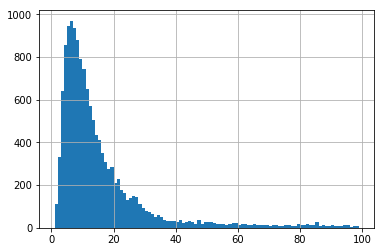

In [106]:
#Distribucion de duraciones en fines de semana con un evento climatico
trips_weather.loc[np.logical_and(~clima_normal,fin_de_semana),"duration"].hist(bins=range(1,100))

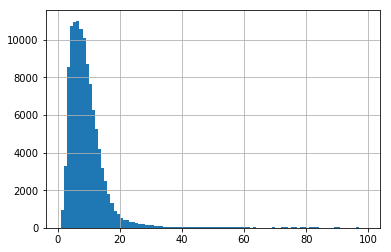

In [30]:
#Distribucion de duraciones en dia de semana con un evento climatico
trips_weather.loc[np.logical_and(~clima_normal,dia_de_semana),"duration"].hist(bins=range(1,100))

In [120]:
trips_weather["diaDeSemana"] = trips_weather.date.dt.dayofweek < 5
trips_weather["llueve"] = llueve
trips_weather["hour"] = trips_weather.start_date.dt.hour
trips_weather["isSubscriber"] = trips_weather.subscription_type == "Subscriber"

trips_weather.columns

Index([u'id', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'bike_id', u'subscription_type', u'zip_code_x',
       u'week_day', u'date', u'max_temperature_f', u'mean_temperature_f',
       u'min_temperature_f', u'max_dew_point_f', u'mean_dew_point_f',
       u'min_dew_point_f', u'max_humidity', u'mean_humidity', u'min_humidity',
       u'max_sea_level_pressure_inches', u'mean_sea_level_pressure_inches',
       u'min_sea_level_pressure_inches', u'max_visibility_miles',
       u'mean_visibility_miles', u'min_visibility_miles',
       u'max_wind_Speed_mph', u'mean_wind_speed_mph', u'max_gust_speed_mph',
       u'precipitation_inches', u'cloud_cover', u'events', u'wind_dir_degrees',
       u'zip_code_y', u'diaDeSemana', u'llueve', u'hour', u'isSubscriber'],
      dtype='object')

In [108]:
trips_weather.loc[:, ["duration", "diaDeSemana", "llueve","mean_wind_speed_mph", "zip_code_x", "isSubscriber"]].corr().abs()

,duration,diaDeSemana,llueve,mean_wind_speed_mph,isSubscriber
duration,1.000000,0.197200,0.025692,0.011230,0.425612
diaDeSemana,0.197200,1.000000,0.033031,0.001074,0.360136
llueve,0.025692,0.033031,1.000000,0.114760,0.048580
mean_wind_speed_mph,0.011230,0.001074,0.114760,1.000000,0.032452
isSubscriber,0.425612,0.360136,0.048580,0.032452,1.000000


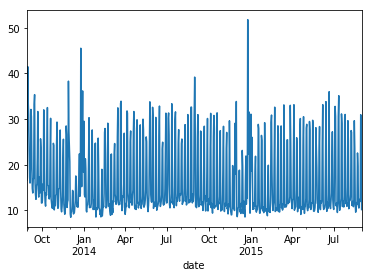

In [109]:
trips_weather.groupby("date").mean()["duration"].plot()

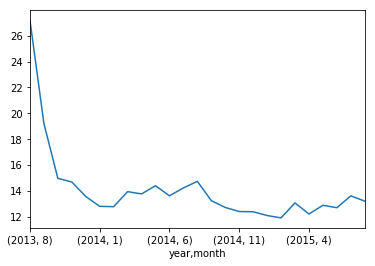

In [121]:
trips_weather["month"] = trips_weather.date.dt.month
trips_weather["year"] = trips_weather.date.dt.year


trips_weather.groupby(["year","month"]).mean()["duration"].plot()


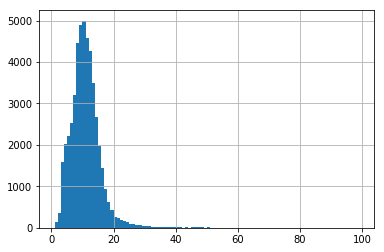

In [35]:
trips_weather.loc[trips_weather.start_station_id == 70,"duration"].hist(bins=range(1,100))

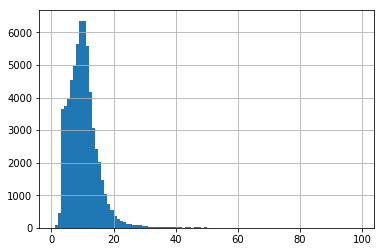

In [36]:
trips_weather.loc[trips_weather.end_station_id == 70,"duration"].hist(bins=range(1,100))

In [122]:
trips_weather_station = pd.merge(trips_weather, stations, left_on='start_station_id', right_on='id', how='inner')
trips_weather_station = pd.merge(trips_weather_station, stations, left_on='end_station_id', right_on='id', how='inner', suffixes=["z_", "w_"])

trips_weather_station.columns

Index([u'id_x', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'bike_id', u'subscription_type', u'zip_code_x',
       u'week_day', u'date', u'max_temperature_f', u'mean_temperature_f',
       u'min_temperature_f', u'max_dew_point_f', u'mean_dew_point_f',
       u'min_dew_point_f', u'max_humidity', u'mean_humidity', u'min_humidity',
       u'max_sea_level_pressure_inches', u'mean_sea_level_pressure_inches',
       u'min_sea_level_pressure_inches', u'max_visibility_miles',
       u'mean_visibility_miles', u'min_visibility_miles',
       u'max_wind_Speed_mph', u'mean_wind_speed_mph', u'max_gust_speed_mph',
       u'precipitation_inches', u'cloud_cover', u'events', u'wind_dir_degrees',
       u'zip_code_y', u'diaDeSemana', u'llueve', u'hour', u'isSubscriber',
       u'month', u'year', u'id_y', u'namez_', u'latz_', u'longz_',
       u'dock_countz_', u'cityz_', u'installation_datez_', u'id', u'namew_

In [123]:
trips_weather_station = trips_weather_station.drop('start_station_name',1)\
                                             .drop('end_station_name',1)\
                                             .drop('bike_id',1)\
                                             .drop('zip_code_x',1)\
                                             .drop('max_humidity',1)\
                                             .drop('min_humidity',1)\
                                             .drop('max_sea_level_pressure_inches',1)\
                                             .drop('mean_sea_level_pressure_inches',1)\
                                             .drop('min_sea_level_pressure_inches',1)\
                                             .drop('max_visibility_miles',1)\
                                             .drop('min_visibility_miles',1)\
                                             .drop('max_wind_Speed_mph',1)\
                                             .drop('max_gust_speed_mph',1)

trips_weather_station = trips_weather_station.drop('wind_dir_degrees',1)\
                                             .drop('zip_code_y',1)\
                                             .drop('max_temperature_C',1)\
                                             .drop('min_temperature_C',1)\
                                             .drop('hour',1)\
                                             .drop('id_y',1)\
                                             .drop('namez_',1)\
                                             .drop('mean_dew_point_C',1)\
                                             .drop('max_dew_point_C',1)\
                                             .drop('min_dew_point_C',1)\
                                             .drop('installation_datew_',1)\
                                             .drop('dock_countw_',1)\
                                             .drop('namew_',1)\
                                             .drop('id',1)\
                                             .drop('installation_datez_',1)\
                                             .drop('dock_countz',1)\
                                             .drop('installation_datew_',1)\
                                             .drop('dock_countw_',1)     

                                            
                                            

ValueError: labels ['max_temperature_C'] not contained in axis

In [125]:
trips_weather_station.groupby(["cityw_", "cityz_"]).mean()["duration"]

cityw_         cityz_       
Mountain View  Mountain View     12.543753
               Palo Alto         33.741849
               Redwood City     173.433333
               San Francisco    102.700000
               San Jose         179.000000
Palo Alto      Mountain View     36.994164
               Palo Alto         32.509005
               Redwood City      69.361754
               San Francisco    319.675000
Redwood City   Mountain View    114.883333
               Palo Alto         34.799020
               Redwood City      14.081972
               San Francisco    116.440000
San Francisco  Mountain View    188.133333
               Palo Alto        233.711111
               Redwood City       3.933333
               San Francisco     13.433869
               San Jose         165.716667
San Jose       Mountain View    169.256667
               San Francisco    294.366667
               San Jose          12.560125
Name: duration, dtype: float64